## Clear Seas Research Co-op Position Assessment

The Pacific Pilotage Authority (PPA) is responsible for marine pilotage in the coastal waters of British Columbia. Pilots help vessels, like tankers and cargo ships, navigate through local waters as they come into berth at the Port of Vancouver. The PPA publishes data on vessel movements in their jurisdictional area, which includes information about the type of vessel, the origin and destination of the vessel, and the date and time the pilot was called to the vessel.

Using the information on the PPA’s website, walk us through **how you would calculate the number of tanker visits to the Port of Vancouver in 2023.** The vessel movement data can be found here: https://www.ppa.gc.ca/vessel-movement-data

1. Setup and imports
2. Collecting data
3. Data cleaning and preparation
4. Data analysis

In [193]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
# Collecting data
data_2023 = pd.read_excel('All Assignments 2023.xlsx')
data_2023.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,SHOFU MARU,9919395,7KMV,100422,58209,235.0,43.00,13.91,7.85,Bulker,PRINCE RUPERT ANCHORAGE 21,TRIGON PACIFIC TERMINALS,2023-01-01 05:00:00,2023-01-01 09:30:00,NaT,NaT
1,ARCHON,9828948,V7HL3,82084,44132,229.0,32.26,14.45,7.60,Bulker,TRIPLE ISLAND,PRINCE RUPERT ANCHORAGE 4,2023-01-01 11:00:00,2023-01-01 16:37:00,NaT,NaT
2,DARYA HEERA,9909077,VRUC9,61083,34534,199.9,32.29,13.00,6.55,Bulker,NANAIMO ANCHORAGE 6,NEPTUNE 2,2023-01-01 18:00:00,2023-01-01 22:50:00,NaT,NaT


- IMO: International Maritime Organization
- DWT: Deadweight Tonnage, the max weight a ship can carry when fully loaded
- GRT: Gross Register Tonnage, a ship's total internal volumne expressed in register tons
- LOA: Length overall, the max length of a vessel's hull measured parallel to the waterline
- Beam: a measure of the width of the ship
- S.Draft: summer draft, the max draft a vessel can have during the summer season
- Actual Draft: the real-time measurement of the vessel's draft at a given moment

In [195]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13217 entries, 0 to 13216
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vessel                13217 non-null  object        
 1   IMO                   13217 non-null  int64         
 2   Call Sign             13213 non-null  object        
 3   DWT                   13217 non-null  object        
 4   GRT                   13217 non-null  int64         
 5   LOA                   13217 non-null  float64       
 6   Beam                  13217 non-null  float64       
 7   S.Draft               13193 non-null  float64       
 8   Actual Draft          13217 non-null  float64       
 9   Type                  13217 non-null  object        
 10  From Location         13217 non-null  object        
 11  To Location           13217 non-null  object        
 12  First Pilot Ordered   13217 non-null  datetime64[ns]
 13  First Pilot Deba

In [196]:
# Filter for `Tanker` in the 'Type' column
tanker_2023 = data_2023[(data_2023['Type'] == 'Tanker')]

In [197]:
# Get the name of ports/terminals
to_location = tanker_2023['To Location']
num_categories = to_location.nunique()

# num_categories # 78
unique_locations = to_location.unique().tolist()

# for location in unique_locations:
#     print(location) # doesn't show me all the values

In [198]:
# Define the list of the Port of Vancouver terminal keywords
# Assumption: there is no mislabelled value
port_of_van = ['ANNACIS', 'FRASER SURREY', 'LYNNTERM', 'ALLIANCE', 'CARGILL', 
                'CASCADIA', 'FIBRECO', 'G3 TERMINAL', 'IOCO', 'BC SUGAR',
                'NEPTUNE', 'Pacific Coast Terminals', 'PACIFIC ELEVATOR', 
                'PARKLAND MARINE TERMINAL', 'RICHARDSON', 'SHELLBURN',
                'SUNCOR', 'Univar', 'VANCOUVER WHARVES', 'WESTRIDGE TERMINAL',
                'Westshore Terminals']

# no Richmond Auto, Chemtrade Chemical, Fraser Grain Terminal Ltd., West Coast Reduction.

In [199]:
# create a pattern from the list of keywords
pattern = '|'.join(port_of_van) 

# Filter for rows where 'To Location' contains any of the keywords
tanker_2023 = tanker_2023[tanker_2023['To Location'].str.contains(pattern, case = False, regex = True)]
tanker_2023.head()

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
7939,NCC NOOR,9399260,HZED,45565,29234,183.00,32.45,12.17,10.20,Tanker,ENGLISH BAY PILOT CHANGE (EBZ),KINDER MORGAN 2 (Vancouver Wharves) (KM2),2023-02-06 13:00:00,2023-02-06 15:10:00,2023-02-06 13:00:00,2023-02-06 15:10:00
7941,NCC NOOR,9399260,HZED,45565,29234,183.00,32.45,12.17,8.80,Tanker,INDIAN ARM ANCHORAGE M (VHM),PARKLAND MARINE TERMINAL (STN),2023-02-10 01:30:00,2023-02-10 03:03:00,NaT,NaT
9610,ARDMORE DEFENDER,9707390,V7HS5,37764,23702,184.06,27.45,11.56,8.50,Tanker,INDIAN ARM ANCHORAGE K (VHK),PORT MOODY 1 (Pacific Coast Terminals) (PM1),2023-02-01 09:00:00,2023-02-01 11:05:00,NaT,NaT
9617,TSURUGI GALAXY,9875501,3FZX7,26143,16589,159.03,27.10,10.12,6.95,Tanker,VANCOUVER HARBOUR ANCHORAGE C (VHC),PORT MOODY 1 (Pacific Coast Terminals) (PM1),2023-02-05 11:30:00,2023-02-05 14:10:00,NaT,NaT
9622,TORM INDIA,9440033,OZPK2,46838,29141,183.17,32.24,12.32,9.00,Tanker,VANCOUVER HARBOUR ANCHORAGE B (VHB),PETRO-CANADA (SUNCOR) (PET),2023-02-07 12:15:00,2023-02-07 15:25:00,NaT,NaT


In [200]:
# Count the number of tanker visits to Port of Vancouver
tanker_visits_count_2023 = tanker_2023.shape[0]
tanker_visits_count_2023

230

https://www.portvancouver.com/cargo-and-terminals

In [201]:
# Collecting data (2016 - 2024)
data_2016 = pd.read_excel('All Assignments 2016 for web.xls')
data_2016.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,STAR FUJI,8309830,LAVX4,40850,25345,187.31,29.47,11.82,9.62,General Cargo,KITIMAT EUROCAN 1,TRIPLE ISLAND,2016-01-01 00:30:00,2016-01-01 10:25:00,2016-01-01 00:30:00,2016-01-01 10:25:00
1,ZAMPA BLUE,9454163,3FYS6,178459,92249,292.00,44.98,17.99,12.57,Bulk Carrier,ROBERTS BANK 1,BROTCHIE (SEA),2016-01-01 01:00:00,2016-01-01 08:33:00,NaT,NaT
2,GIULIA I,9638135,9HA3585,39202,25303,179.99,30.00,10.5,7.35,Bulk Carrier,TRIPLE ISLAND,PRINCE RUPERT ANCHORAGE 5,2016-01-01 02:00:00,2016-01-01 05:00:00,NaT,NaT


In [202]:
data_2017 = pd.read_excel('All Assignments 2017 for web.xls')
data_2017.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,ZAO GALAXY,9566150,V7YK9,26198,16408,159.03,27.13,10.01,10.05,Tanker,BROTCHIE (SEA),LYNN TERM 7,2017-01-01 02:00:00,2017-01-01 08:46:00,NaT,NaT
1,YOUNGHEUNG,9502934,3EUB4,179221,93152,291.97,45.00,18.22,9.52,Bulk Carrier,ROYAL ROADS ANCHORAGE D,ROBERTS BANK 1,2017-01-01 03:00:00,2017-01-01 08:55:00,NaT,NaT
2,NECKLACE,9548225,5BSN3,92903,51208,229.20,38.04,14.9,6.94,Bulk Carrier,BROTCHIE (SEA),ENGLISH BAY ANCHORAGE 01,2017-01-01 03:00:00,2017-01-01 09:17:00,NaT,NaT


In [203]:
data_2018 = pd.read_excel('All Assignments 2018 for web.xls')
data_2018.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,IVS NORTH BERWICK,9740902,9V3774,60475,34233,199.98,32.29,12.96,12.70,Bulk Carrier,ENGLISH BAY ANCHORAGE 15,BROTCHIE (SEA),2018-01-01 01:00:00,2018-01-01 07:48:00,NaT,NaT
1,SAKURA OCEAN,9599822,3FRC8,38239,23268,179.97,29.80,10.54,10.45,Bulk Carrier,PORT MOODY 2,BROTCHIE (SEA),2018-01-01 04:00:00,2018-01-01 12:16:00,2018-01-01 04:00:00,2018-01-01 12:16:00
2,ANDREAS K,9438121,5BVX2,91873,51130,229.50,36.97,14.7,9.50,Bulk Carrier,NANAIMO ANCHORAGE 4,VANCOUVER HARBOUR ANCHORAGE A,2018-01-01 06:00:00,2018-01-01 10:00:00,NaT,NaT


In [204]:
data_2019 = pd.read_excel('All Assignments 2019.xls')
data_2019.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,Beam,LOA,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,OCEAN CENTURY,9485033,TCZY7,55848,31540,32.30,189.99,12.74,6.95,Bulk Carrier,PRINCE RUPERT ANCHORAGE 7,STEWART ORE DOCK (Bulk Terminals),2019-01-01 02:00:00,2019-01-01 13:00:00,2019-01-01 02:00:00,2019-01-01 13:00:00
1,MISATO K,9634438,3FLD9,56048,31754,32.25,189.99,12.72,6.81,Bulk Carrier,BROTCHIE (SEA),VANCOUVER HARBOUR ANCHORAGE C,2019-01-01 04:00:00,2019-01-01 10:40:00,NaT,NaT
2,DARYA MOTI,9471252,VRGN2,80545,43842,32.29,229.00,14.45,6.60,Bulk Carrier,BROTCHIE (SEA),ENGLISH BAY ANCHORAGE 05,2019-01-01 05:00:00,2019-01-01 11:00:00,NaT,NaT


In [205]:
data_2020 = pd.read_excel('All Assignments 2020.xlsx')
data_2020.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,Beam,LOA,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,SAGAMI,9379911,3ETH,33614,19420,26.63,170.00,11.32,8.50,Tanker,PORT MOODY 1 (Pacific Coast Terminals),VANCOUVER HARBOUR ANCHORAGE N,2020-01-01 02:00:00,2020-01-01 03:10:00,NaT,NaT
1,NAVIG8 SPARK,9731743,V7ST4,25196,16084,25.00,160.00,10.37,5.50,Tanker,ENGLISH BAY ANCHORAGE 11,PORT MOODY 1 (Pacific Coast Terminals),2020-01-01 02:00:00,2020-01-01 05:40:00,NaT,NaT
2,SWIFT ACE,9338838,C6XB8,18865,58685,32.26,199.95,9.82,9.05,Car Carrier,BROTCHIE (SEA),ENGLISH BAY ANCHORAGE 11,2020-01-01 04:00:00,2020-01-01 08:50:00,NaT,NaT


In [206]:
data_2021_Q4 = pd.read_excel('All Assignments Q4 2021.xlsx')
data_2021_Q4.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,DORIC WARRIOR,9453511,A8WQ4,93115,51208,230.00,38.06,14.9,6.99,Bulk Carrier,BROTCHIE (SEA),VANCOUVER HARBOUR ANCHORAGE C,2021-01-01 05:00:00,2021-01-01 11:50:00,NaT,NaT
1,RANGAKU,9866627,D5WF2,63533,35645,199.98,32.24,13.42,9.17,Bulk Carrier,VANCOUVER HARBOUR ANCHORAGE E,PLUMPER SOUND ANCHORAGE C,2021-01-01 07:00:00,2021-01-01 12:15:00,NaT,NaT
2,KEN UN,9727089,3EGQ5,37429,22469,179.99,30.00,10.33,6.62,Bulk Carrier,BROTCHIE (SEA),KULLEET BAY ANCHORAGE 2,2021-01-01 08:00:00,2021-01-01 12:55:00,NaT,NaT


In [207]:
data_2022 = pd.read_excel('All Assignments 2022.xls')
data_2022.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,APL TURKEY,9532771,A8TR2,72912,71787,293.20,40.0,14.02,13.50,Container,PRINCE RUPERT ANCHORAGE 24,PRINCE RUPERT ANCHORAGE 29,2022-01-01 02:30:00,2022-01-01 02:25:00,NaT,NaT
1,NORDIC CALLAO,9796822,3ECB4,26029,16572,159.03,27.1,10.12,9.95,Tanker,PORT MOODY 1 (Pacific Coast Terminals),ENGLISH BAY PILOT CHANGE,2022-01-01 03:50:00,2022-01-01 06:50:00,NaT,NaT
2,SYNERGY BUSAN,9450571,V7A2725,50727,40030,260.00,32.3,12.60,9.70,Container,VANCOUVER HARBOUR ANCHORAGE B,BROTCHIE (SEA),2022-01-01 05:00:00,2022-01-01 09:55:00,NaT,NaT


In [208]:
data_2024_Q1 = pd.read_excel('2024 Q1 All Assignments.xlsx')
data_2024_Q1.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,UNITY VENTURE,9773739,VRPW9,112186,60264,237.00,44.0,15.00,8.2,Tanker,INDIAN ARM ANCHORAGE L (VHL),WESTRIDGE TERMINAL BERTH 1 (WR1),2024-01-01 06:00:00,2024-01-01 08:50:00,NaT,NaT
1,AURORA,9920966,WDL8377,393,782,124.00,14.0,3.66,3.4,Tug,INDIAN ARM ANCHORAGE N (VHN),IOCO (IMPERIAL OIL CO.) (IOC),2024-01-01 06:00:00,2024-01-01 08:30:00,NaT,NaT
2,MSC ATHOS,9618317,5LKV7,116993,96262,299.95,48.2,15.00,10.4,Container,BROTCHIE (SEA) (BRO),VANTERM 6 (VT6),2024-01-01 07:00:00,2024-01-01 12:57:00,NaT,NaT


In [209]:
data_2024_Q2 = pd.read_excel('2024 Q2 All Assignments.xlsx')
data_2024_Q2.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,FEDERAL OAK,9860415,D5WH9,60385,34582,199.99,32.25,12.95,8.79,Bulker,ENGLISH BAY ANCHORAGE 10 (E10),SANDHEADS (SHD),2024-04-01 01:00:00,2024-04-01 02:58:00,NaT,NaT
1,COSCO BOSTON,9335173,3ELF2,68240,54778,294.07,32.21,13.50,10.70,Container,TRIPLE ISLAND (TPL),PRINCE RUPERT FAIRVIEW 2 (South) (PF2),2024-04-01 03:00:00,2024-04-01 06:58:00,NaT,NaT
2,FEDERAL OAK,9860415,D5WH9,60385,34582,199.99,32.25,12.95,8.79,Bulker,SANDHEADS (SHD),FRASER SURREY 4 (FS4),2024-04-01 03:00:00,2024-04-01 06:35:00,NaT,NaT


In [210]:
data_2024_Q3 = pd.read_excel('2024 Q3 All Assignments.xlsx')
data_2024_Q3.head(3)

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,RUBY PRINCESS,9378462,ZCDY2,8044,113561,288.60,36.02,8.5,8.5,Passenger,PINE ISLAND (PIN),CANADA PLACE EAST (CPE),2024-07-01 12:30:00,2024-07-02 07:30:00,2024-07-01 12:30:00,2024-07-02 07:30:00
1,ROALD AMUNDSEN,9813072,LAZP7,1800,21765,140.00,23.60,5.5,5.5,Passenger,NORTHLAND CRUISE TERMINAL (NCT),CANADA PLACE WEST (CPW),2024-07-01 23:45:00,2024-07-04 07:45:00,2024-07-01 23:45:00,2024-07-04 07:45:00
2,ZAANDAM,9156527,PDAN,6150,61396,237.95,32.25,8.1,8.1,Passenger,TRIPLE ISLAND (TPL),CANADA PLACE WEST (CPW),2024-07-02 00:15:00,2024-07-03 07:30:00,2024-07-02 00:15:00,2024-07-03 07:30:00


In [211]:
# Merge datasets for Q1, Q2, and Q3 in 2024 since the other datasets represent an entire yr
merged_2024_Q1_Q2 = pd.merge(data_2024_Q1, data_2024_Q2, how = 'outer')
merged_2024 = pd.merge(merged_2024_Q1_Q2, data_2024_Q3, how = 'outer')

merged_2024.shape[0]

10465

In [212]:
data_2024_Q1.shape[0] + data_2024_Q2.shape[0] + data_2024_Q3.shape[0]

10465

In [213]:
# Filter for rows where 'To Location' contains any of the keywords for 2016-2024
# Assumption: tankers visited the same terminals in 2016-2024 as they did in 2023
tanker_2016 = data_2016[(data_2016['Type'] == 'Tanker') & 
                        (data_2016['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2016.head()

tanker_2016.shape[0]

59

In [214]:
tanker_2017 = data_2017[(data_2017['Type'] == 'Tanker') & 
                        (data_2017['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2017.head()

tanker_2017.shape[0]

72

In [215]:
tanker_2018 = data_2018[(data_2018['Type'] == 'Tanker') & 
                        (data_2018['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2018.head()

tanker_2018.shape[0]

133

In [216]:
tanker_2019 = data_2019[(data_2019['Type'] == 'Tanker') & 
                        (data_2019['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2019.head()

tanker_2019.shape[0]

268

In [217]:
tanker_2020 = data_2020[(data_2020['Type'] == 'Tanker') & 
                        (data_2020['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2020.head()

tanker_2020.shape[0]

252

In [218]:
tanker_2021 = data_2021_Q4[(data_2021_Q4['Type'] == 'Tanker') & 
                        (data_2021_Q4['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2021.head()

tanker_2021.shape[0]

206

In [219]:
tanker_2022 = data_2022[(data_2022['Type'] == 'Tanker') & 
                        (data_2022['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2022.head()

tanker_2022.shape[0]

216

In [220]:
tanker_2023.shape[0]

230

In [221]:
tanker_2024 = merged_2024[(merged_2024['Type'] == 'Tanker') & 
                        (merged_2024['To Location'].str.contains(pattern, case = False, regex = True))]
tanker_2024.head()

tanker_2024.shape[0]

260

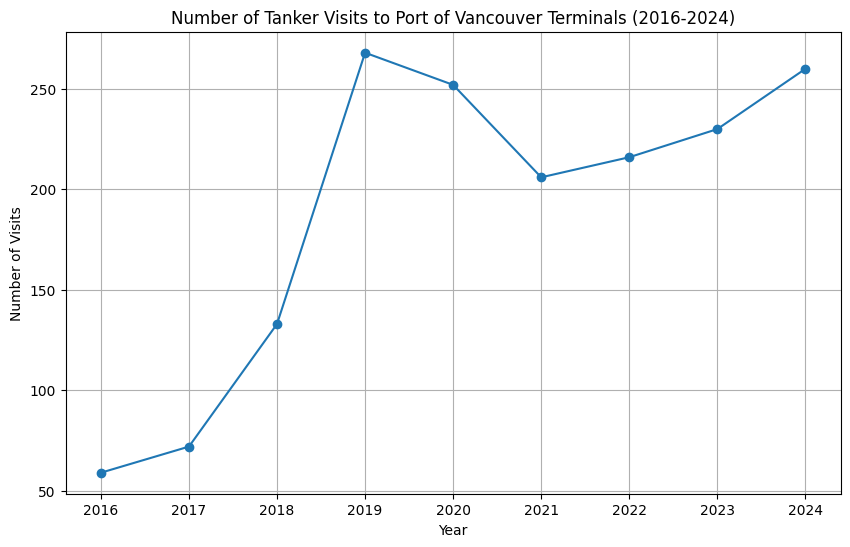

In [222]:
# Store the num of tanker visits for each year in a dictionary
tanker_visits_per_year = {
    2016: tanker_2016.shape[0],
    2017: tanker_2017.shape[0],
    2018: tanker_2018.shape[0],
    2019: tanker_2019.shape[0],
    2020: tanker_2020.shape[0],
    2021: tanker_2021.shape[0],
    2022: tanker_2022.shape[0],
    2023: tanker_2023.shape[0],
    2024: tanker_2024.shape[0]
}

# Create a dataframe
df_visits = pd.DataFrame(list(tanker_visits_per_year.items()), columns=['Year', 'Number of Visits'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_visits['Year'], df_visits['Number of Visits'], marker='o', linestyle='-')
plt.title('Number of Tanker Visits to Port of Vancouver Terminals (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()
